**Import Labraries**

In [1]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

**import Datasets**

In [2]:
!git clone http://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), 117.80 MiB | 6.79 MiB/s, done.


In [3]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [4]:
data= pd.read_csv('german-traffic-signs/signnames.csv')


In [5]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [6]:
with open("german-traffic-signs/train.p", mode= 'rb') as training:
  train= pickle.load(training)

with open("german-traffic-signs/valid.p", mode='rb') as validation:
  valid= pickle.load(validation)

with open ('german-traffic-signs/test.p', mode= 'rb') as testing:
  test=  pickle.load(testing)

X_train, y_train= train['features'], train['labels']
X_val, y_val= valid['features'], valid['labels']
X_test, y_test= test['features'], test['labels']

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label=5


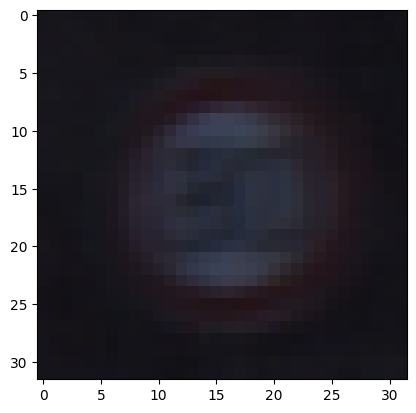

In [7]:
index= np.random.randint(1, len(X_train))
plt.imshow(X_train[index])
print("image label={}".format(y_train[index]))

**Image Pre-processing**

In [8]:
from sklearn.utils import shuffle
X_train, y_train= shuffle(X_train, y_train)

In [9]:
def preprocessing(img):
  #convert grayscale
  img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #histogram qualization
  img= cv2.equalizeHist(img)
  #Normalization
  img= img/ 255
  return img

In [10]:
X_train_proc= np.array(list(map(preprocessing, X_train)))
X_test_proc= np.array(list(map(preprocessing, X_test)))
X_val_proc= np.array(list(map(preprocessing, X_val)))

In [11]:
X_train_proc= X_train_proc.reshape(34799, 32, 32, 1)
X_val_proc= X_val_proc.reshape(4410, 32, 32, 1)
X_test_proc= X_test_proc.reshape(12630, 32, 32, 1)

print(X_train_proc.shape)
print(X_val_proc.shape)
print(X_test_proc.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


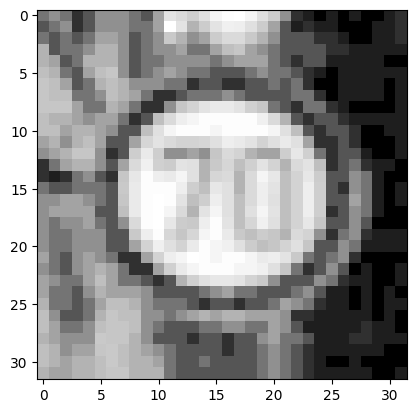

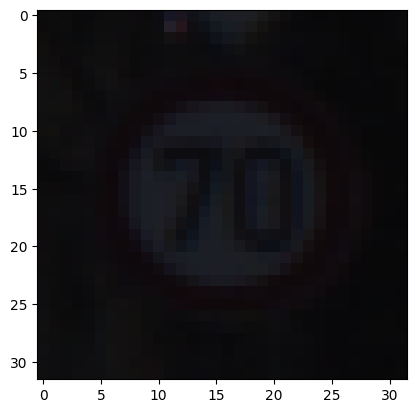

In [12]:
i= random.randint(1, len(X_train))
plt.imshow(X_train_proc[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i].squeeze())

**Convolutional Neural Network**

In [13]:
from keras.layers.activation.relu import ReLU
from keras.activations import softmax
from keras.layers.pooling.max_pooling2d import MaxPool2D


In [14]:
#structure the model
model= Sequential()

#Conv2D: filters, size of filter, input_shape, activation_function
model.add(Conv2D(32,(5,5), activation='relu',  input_shape=(32,32,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(5,5), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

#Dense: ammount of nodes, activation
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

#defining output_layer of our network
#we have 42 classes (data=signnames) so output=43
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [15]:
model.compile(
    Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
history= model.fit(X_train_proc, y_train,
          batch_size= 500,
          epochs=50,
          verbose=1,
          validation_data= (X_val_proc, y_val))

Epoch 1/50
70/70 [==============================] - 11s 22ms/step - loss: 3.5994 - accuracy: 0.0578 - val_loss: 3.5009 - val_accuracy: 0.1170
Epoch 2/50
70/70 [==============================] - 1s 15ms/step - loss: 3.3653 - accuracy: 0.1243 - val_loss: 3.1820 - val_accuracy: 0.3338
Epoch 3/50
70/70 [==============================] - 1s 16ms/step - loss: 2.9129 - accuracy: 0.2714 - val_loss: 2.5574 - val_accuracy: 0.4082
Epoch 4/50
70/70 [==============================] - 1s 17ms/step - loss: 2.4054 - accuracy: 0.3809 - val_loss: 2.0251 - val_accuracy: 0.4864
Epoch 5/50
70/70 [==============================] - 1s 15ms/step - loss: 2.0156 - accuracy: 0.4519 - val_loss: 1.6611 - val_accuracy: 0.5383
Epoch 6/50
70/70 [==============================] - 1s 15ms/step - loss: 1.7501 - accuracy: 0.5046 - val_loss: 1.4055 - val_accuracy: 0.6299
Epoch 7/50
70/70 [==============================] - 1s 15ms/step - loss: 1.5480 - accuracy: 0.5500 - val_loss: 1.2208 - val_accuracy: 0.6773
Epoch 8/50
7

In [17]:
score= model.evaluate(X_test_proc, y_test)
print('Test accuracy', score[1])

history.history.keys()


395/395 [==============================] - 1s 3ms/step - loss: 0.2622 - accuracy: 0.9316
Test accuracy 0.9315914511680603


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

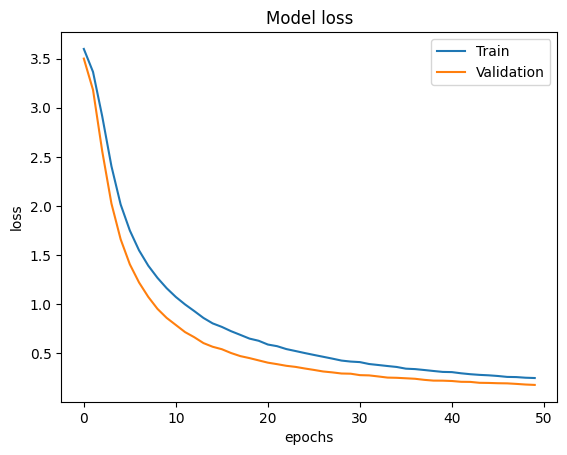

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train', 'Validation'])

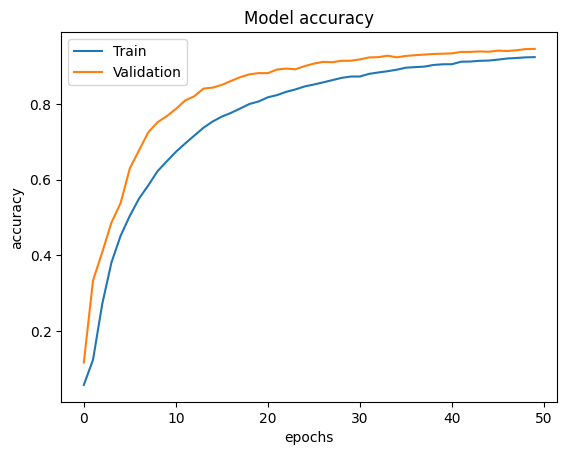

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [20]:
predict_x= model.predict(X_test_proc)
classes_x= np.argmax(predict_x, axis=1)
y_true_label= y_test

395/395 [==============================] - 1s 2ms/step


<Axes: >

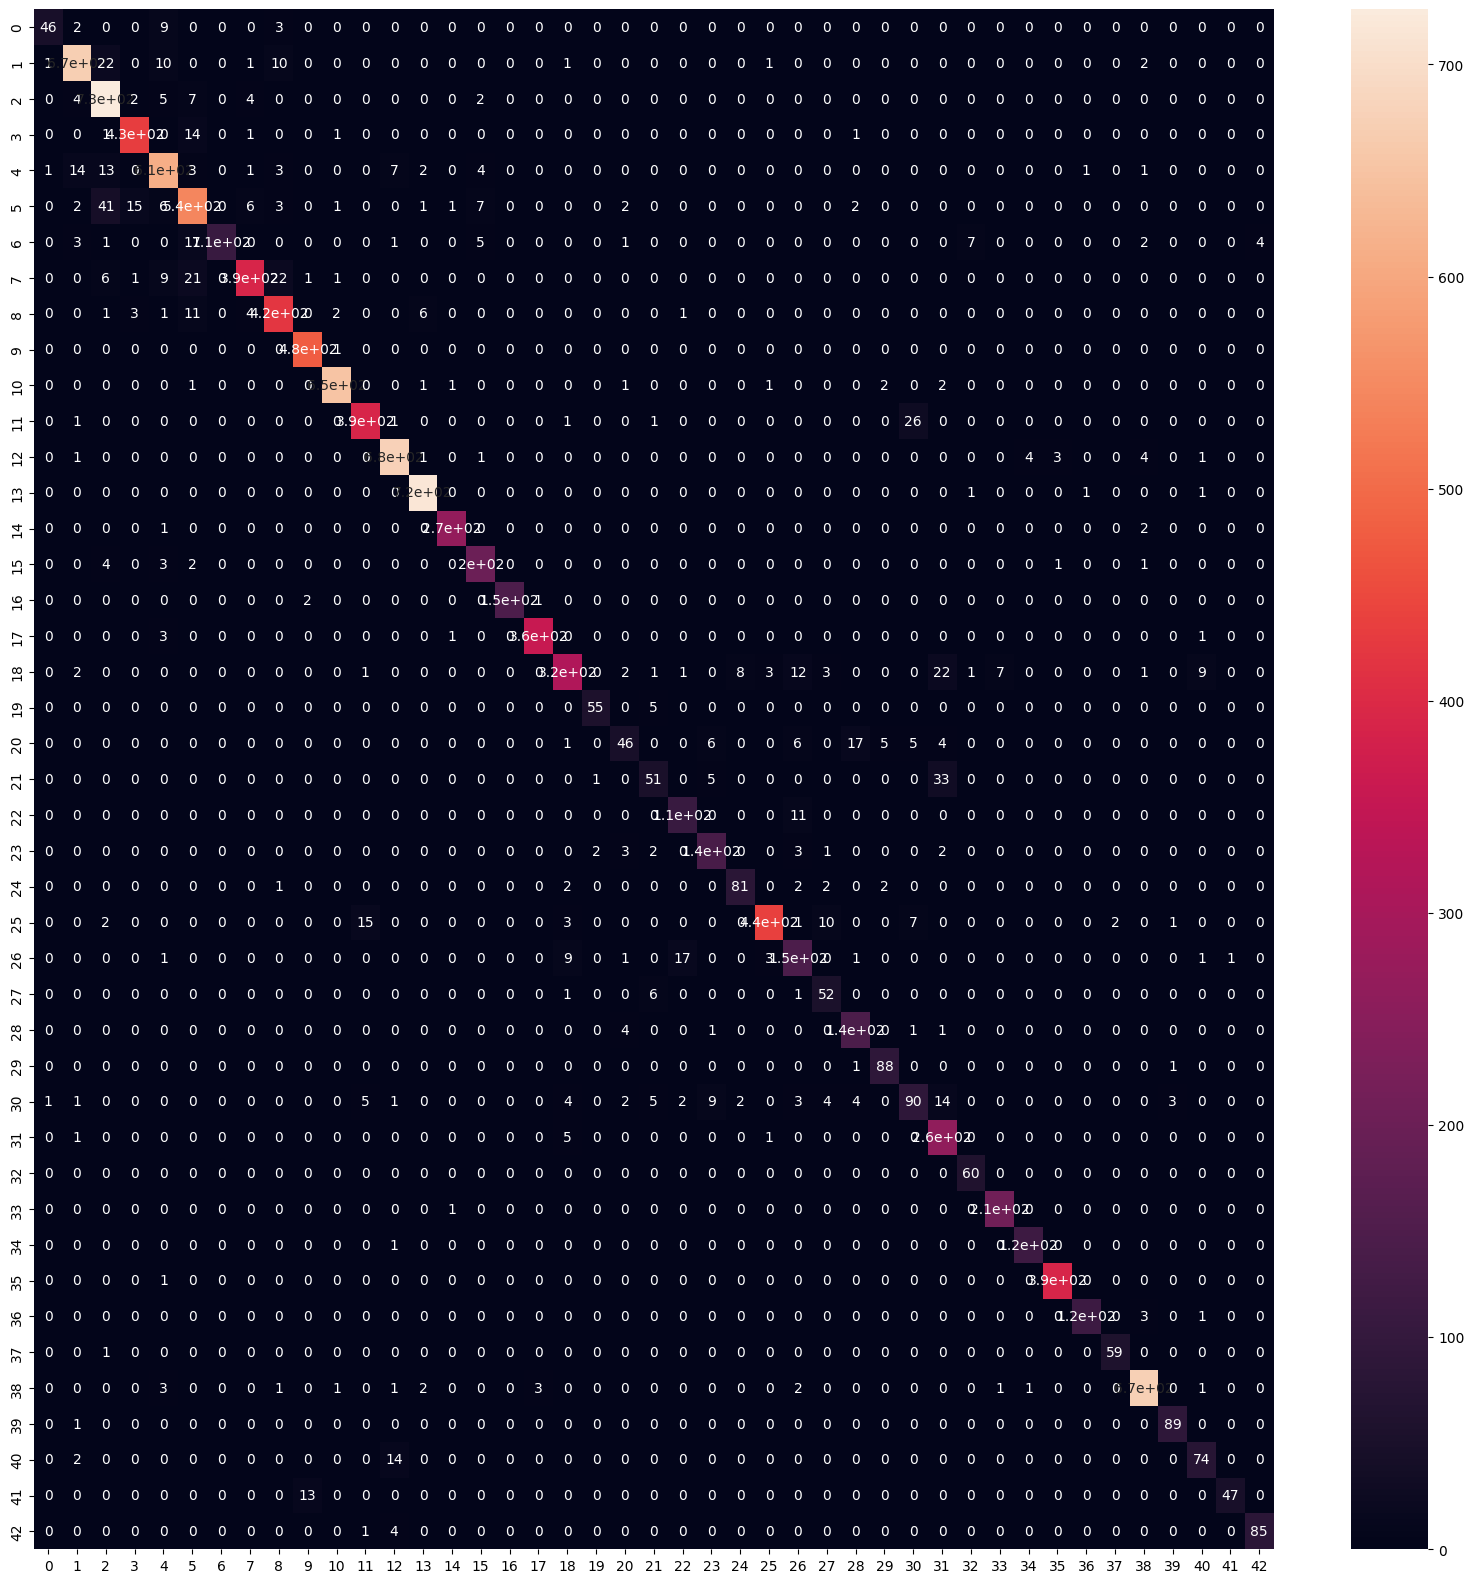

In [21]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_true_label, classes_x)
plt.figure(figsize=(20,20))
sns.heatmap(matrix, annot= True)

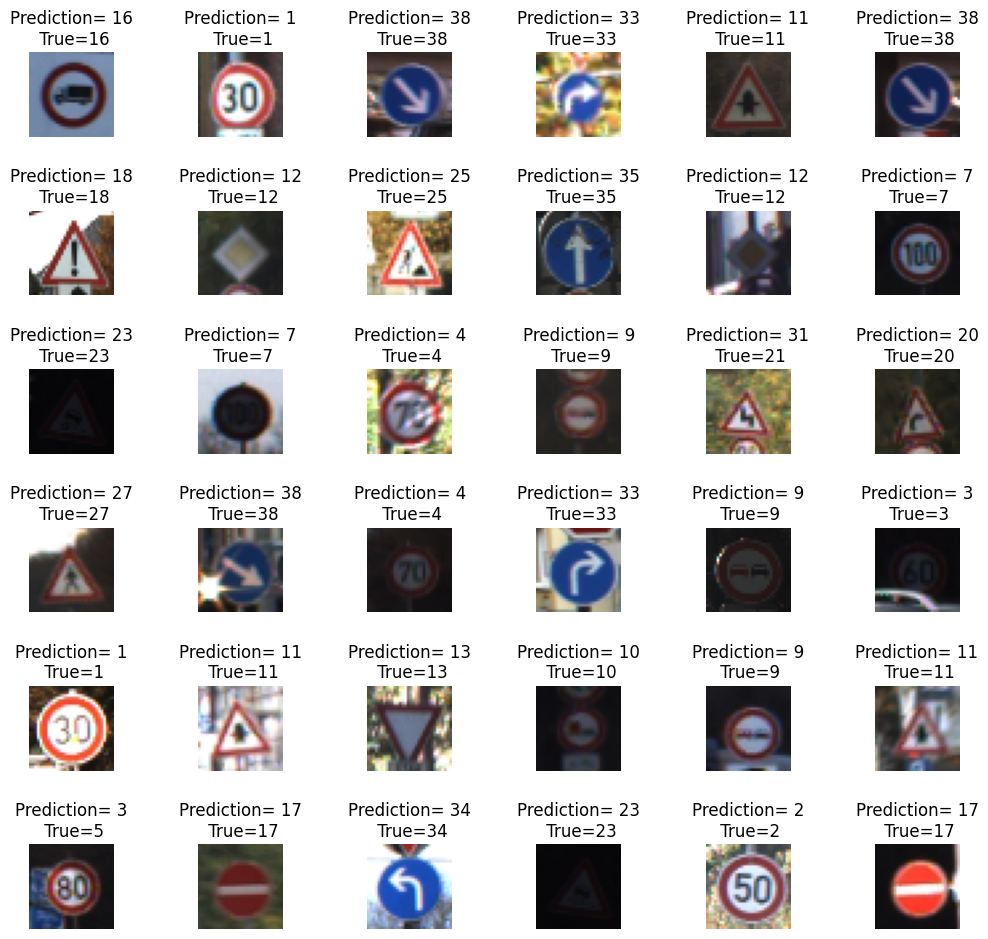

In [22]:
#subplot more than one image
L=6
W=6
fig, axes= plt.subplots(L, W, figsize=(12,12))
axes= axes.ravel()
for i in range(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction= {}\n True={}'.format(classes_x[i], y_true_label[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [23]:
model.save('trafic_model')